In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline


In [7]:
df = pd.read_excel("Patient_Dataset_KMeans.xlsx")
df.head()

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,1,50,Female,23.8,155,120,1,1,1
1,2,79,Female,33.5,140,103,0,1,1
2,3,90,Male,24.6,171,136,1,1,0
3,4,38,Female,37.8,91,125,0,0,0
4,5,40,Female,26.8,112,130,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data preprocessing
# Removing unnecessary columns for analysis
columns_to_use = ['BMI', 'Blood_Pressure', 'Glucose_Level', 'Has_Diabetes', 'Has_Stroke', 'Has_Asthma']
data_for_pca = df[columns_to_use]
data_for_pca

,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,23.8,155,120,1,1,1
1,33.5,140,103,0,1,1
2,24.6,171,136,1,1,0
3,37.8,91,125,0,0,0
4,26.8,112,130,0,0,0
...,...,...,...,...,...,...
195,36.2,113,175,0,0,1
196,27.7,126,195,0,0,1
197,26.7,116,86,0,1,1
198,20.6,179,70,0,1,1


In [9]:
# Data Normalisation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [10]:
from sklearn.cluster import KMeans  # Import KMeans clustering algorithm from scikit-learn library
from sklearn.metrics import silhouette_score  # Import silhouette score metric for evaluating cluster quality

In [11]:
# Applying Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(scaled_data)

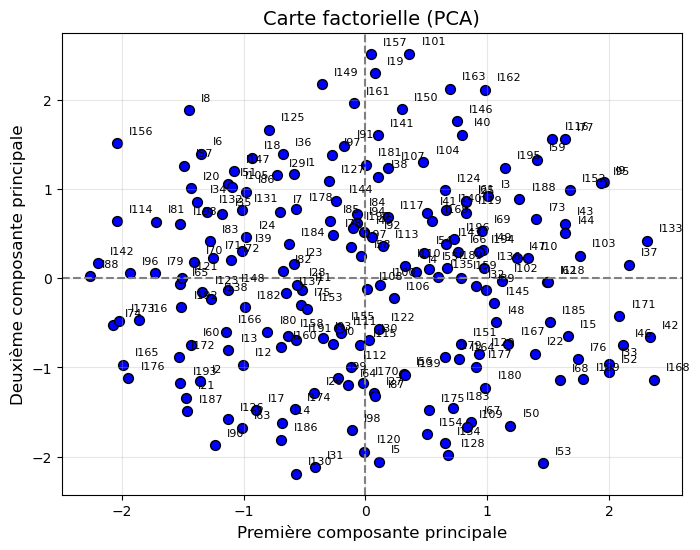

In [16]:
# Exemple de labels (assurez-vous qu'ils correspondent au nombre de points dans les données)
labels = ['I' + str(i) for i in range(len(reduced_data))]

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Ajouter des annotations
for i, label in enumerate(labels):
    plt.text(reduced_data[i, 0] + 0.1, reduced_data[i, 1] + 0.1, label, fontsize=8)

plt.title('Carte factorielle (PCA)', fontsize=14)
plt.xlabel('Première composante principale', fontsize=12)
plt.ylabel('Deuxième composante principale', fontsize=12)
plt.grid(alpha=0.3)

plt.show()


c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


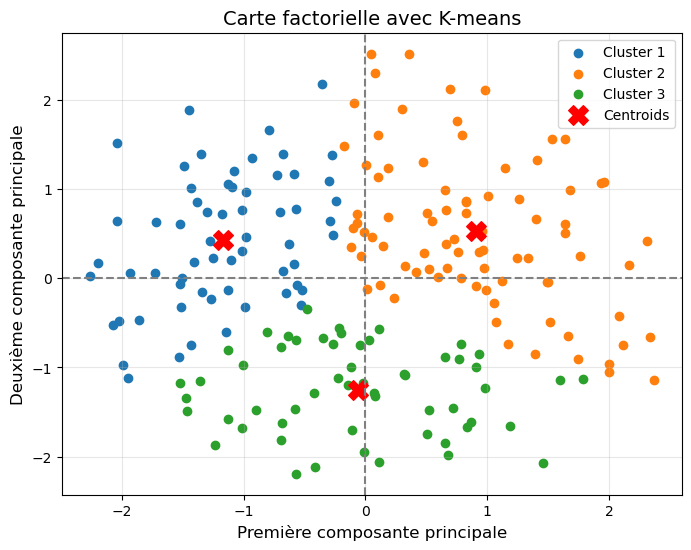

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Définir le nombre de clusters
k = 3  # Vous pouvez ajuster ce paramètre selon vos besoins

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reduced_data)

# Récupérer les étiquettes des clusters
labels = kmeans.labels_

# Récupérer les centres des clusters
centroids = kmeans.cluster_centers_

# Affichage des résultats
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(
        reduced_data[labels == i, 0], reduced_data[labels == i, 1], 
        label=f'Cluster {i+1}'
    )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légende
plt.title('Carte factorielle avec K-means', fontsize=14)
plt.xlabel('Première composante principale', fontsize=12)
plt.ylabel('Deuxième composante principale', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

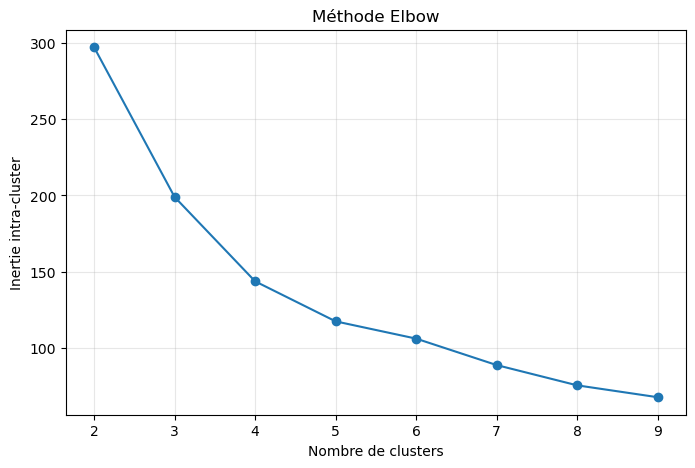

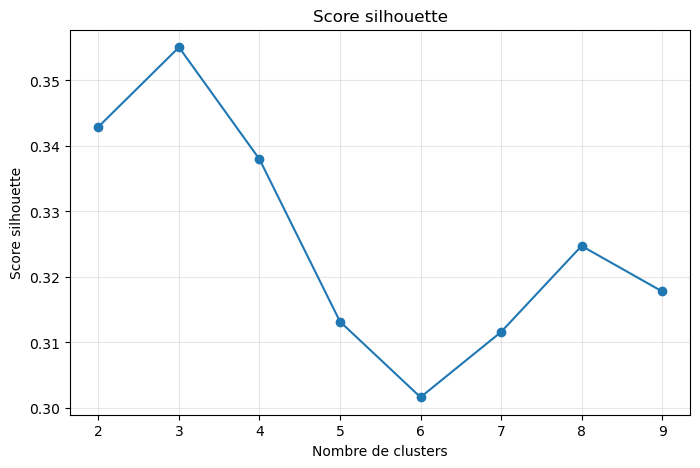

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calcul du score inertie pour différents k
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # Tester pour différents nombres de clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)  # Inertie intra-cluster
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))  # Score silhouette

# Méthode Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-cluster')
plt.grid(alpha=0.3)
plt.show()

# Score silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Score silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score silhouette')
plt.grid(alpha=0.3)
plt.show()


In [20]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Test between 2 and 9 clusters

# Iterate over the range of possible cluster numbers
for k in K_range:
    # Initialize a KMeans model with the current cluster number
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the reduced data
    kmeans.fit(reduced_data)
    # Append the inertia (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)
    # Append the silhouette score (a measure of cluster cohesion and separation) to the list
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


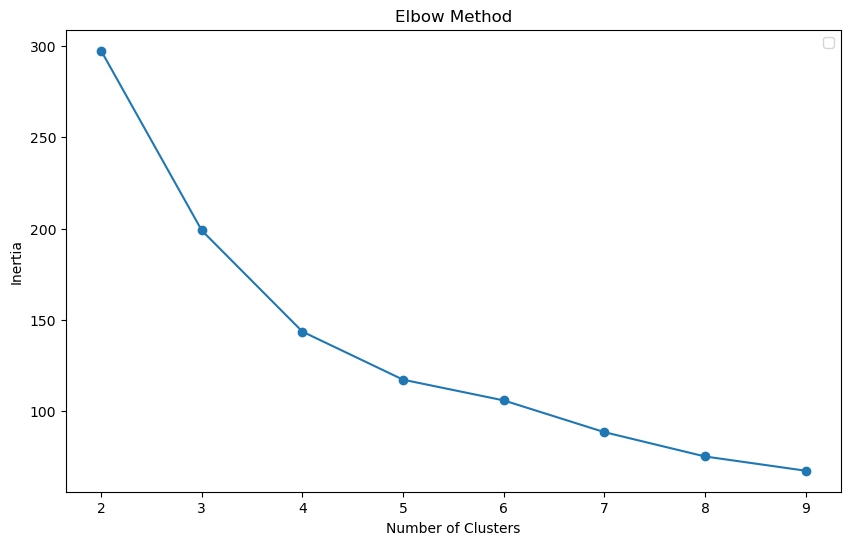

In [29]:
plt.figure(figsize=(10, 6))  # Create a figure with specified size
plt.plot(K_range, inertia, marker='o')  # Plot the inertia values for each K
#plt.scatter(3, inertia[1], s=200, c='red', marker='*', label="K=3 chosen")  # Highlight the chosen K value
plt.xlabel('Number of Clusters')  # Set the x-axis label
plt.ylabel('Inertia')  # Set the y-axis label
plt.title('Elbow Method')  # Set the plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

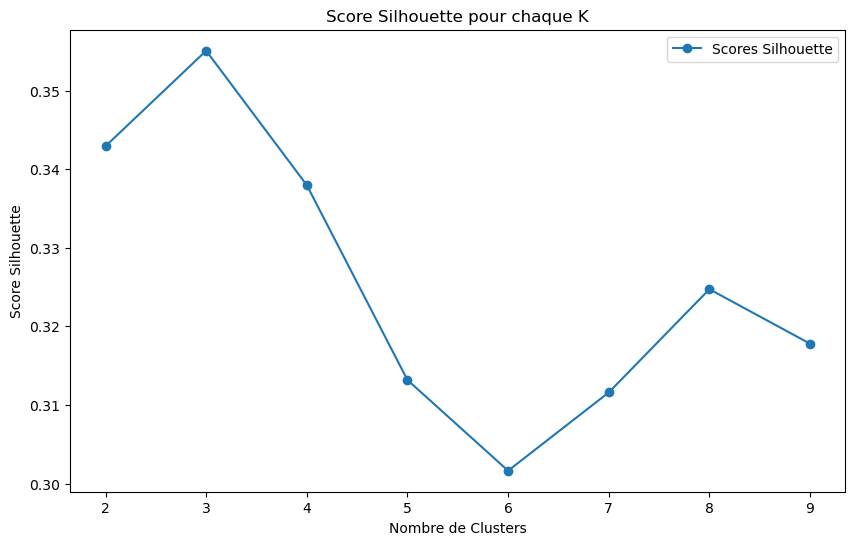

In [30]:
# Visualisation des scores silhouette
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', label='Scores Silhouette')

# Trouver l'indice du score silhouette maximal
best_k_index = silhouette_scores.index(max(silhouette_scores))  # Index du meilleur score
best_k = K_range[best_k_index]  # Correspond au K optimal
best_score = silhouette_scores[best_k_index]  # Score silhouette correspondant

# Ajouter un point rouge pour mettre en évidence le score maximum
#plt.scatter(best_k, best_score, s=200, c='red', marker='*', label=f"K={best_k} choisi")

# Ajouter des labels et un titre
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score Silhouette')
plt.title('Score Silhouette pour chaque K')
plt.legend()  # Ajouter une légende pour identifier K optimal
plt.show()


In [31]:
# Application de K-means avec le nombre optimal de clusters (par exemple 3)
optimal_k = 3  # À ajuster selon l'analyse du graphique du coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
# Ajouter les clusters aux données d'origine
df_clustered = df
df_clustered['Cluster'] = clusters
df_clustered

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma,Cluster
0,1,50,Female,23.8,155,120,1,1,1,2
1,2,79,Female,33.5,140,103,0,1,1,0
2,3,90,Male,24.6,171,136,1,1,0,2
3,4,38,Female,37.8,91,125,0,0,0,1
4,5,40,Female,26.8,112,130,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,196,62,Female,36.2,113,175,0,0,1,1
196,197,78,Male,27.7,126,195,0,0,1,1
197,198,59,Female,26.7,116,86,0,1,1,1
198,199,60,Female,20.6,179,70,0,1,1,0


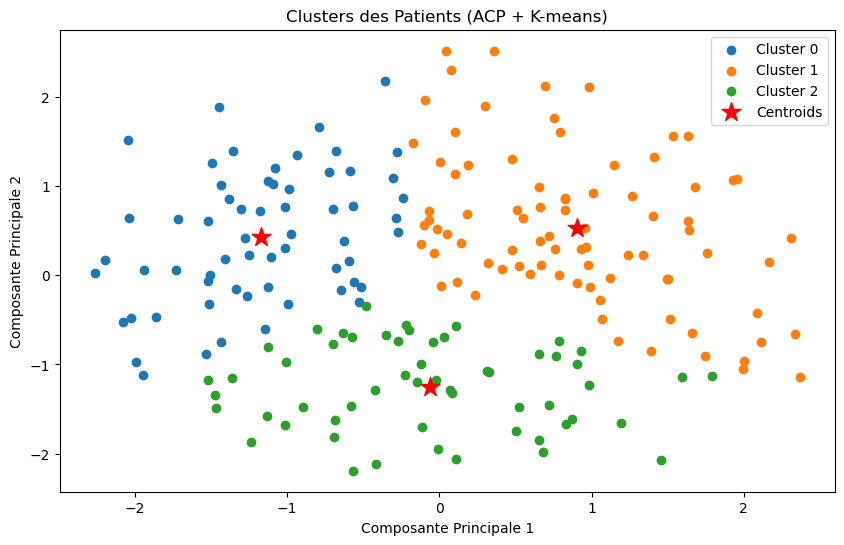

In [33]:
# Visualisation des clusters dans l'espace des composantes principales
plt.figure(figsize=(10, 6))

# Afficher les points pour chaque cluster
for cluster_id in range(optimal_k):
    plt.scatter(
        reduced_data[clusters == cluster_id, 0],  # Points du cluster sur la 1ère composante
        reduced_data[clusters == cluster_id, 1],  # Points du cluster sur la 2ème composante
        label=f'Cluster {cluster_id}'
    )

# Afficher les centroïdes
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # Centroïdes sur la 1ère composante
    kmeans.cluster_centers_[:, 1],  # Centroïdes sur la 2ème composante
    s=200,
    c='red',
    label='Centroids',
    marker='*'
)

# Ajouter des titres et légendes
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters des Patients (ACP + K-means)')
plt.legend()
plt.show()


        PC1       PC2  Cluster
0 -0.269819 -0.733780        2
1 -0.587208  1.167732        0
2 -1.361995 -1.152075        2
3  1.008677  0.918875        1
4  0.414043  0.073907        1


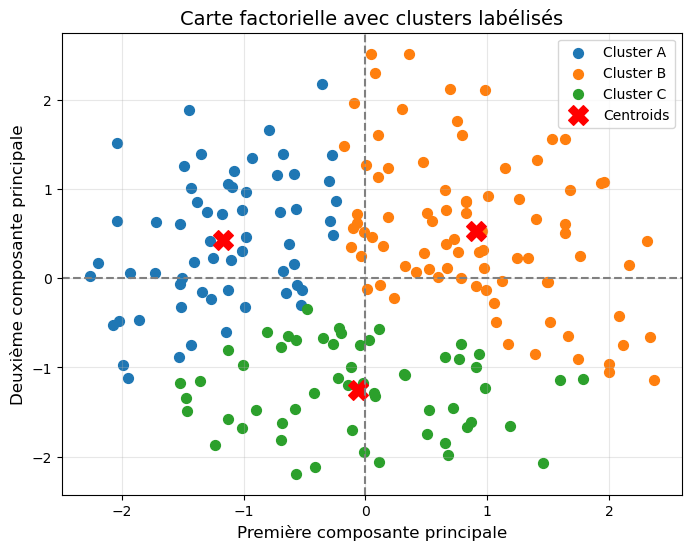

In [35]:
import pandas as pd

# Supposons que 'reduced_data' soit un tableau numpy (résultats PCA) et 'labels' soit la sortie de kmeans
dff = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])  # Créer un DataFrame avec les composantes principales
dff['Cluster'] = labels  # Ajouter les labels des clusters

# Afficher les premières lignes du DataFrame
print(dff.head())


cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}

plt.figure(figsize=(8, 6))
for cluster, name in cluster_names.items():
    subset = dff[dff['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=name, s=50)

# Ajouter les centres des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légende
plt.title('Carte factorielle avec clusters labélisés', fontsize=14)
plt.xlabel('Première composante principale', fontsize=12)
plt.ylabel('Deuxième composante principale', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


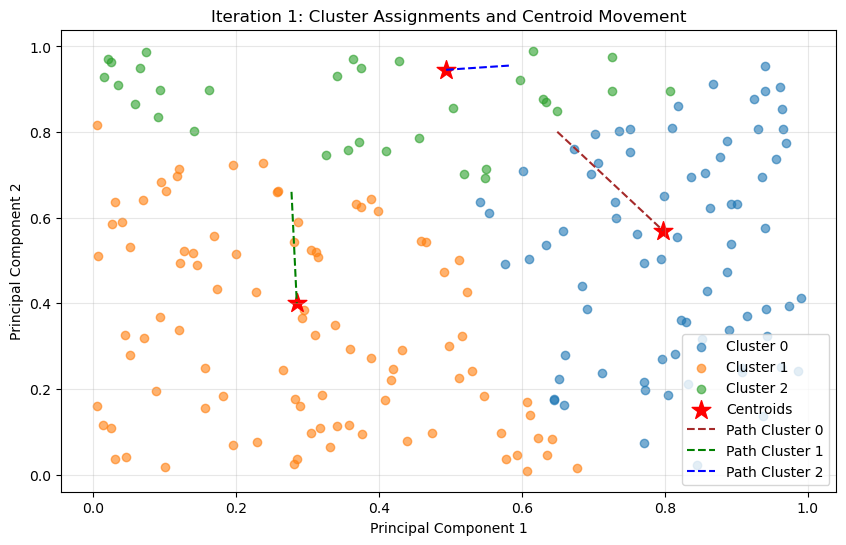

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


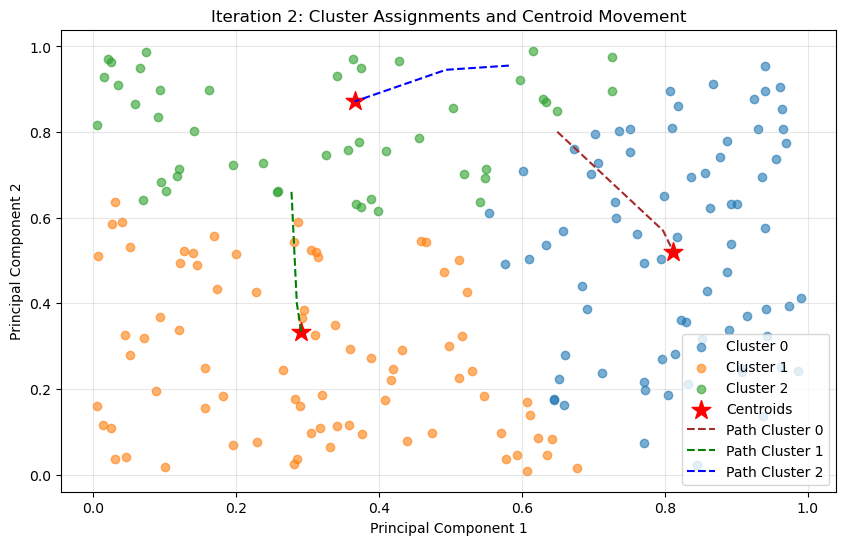

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


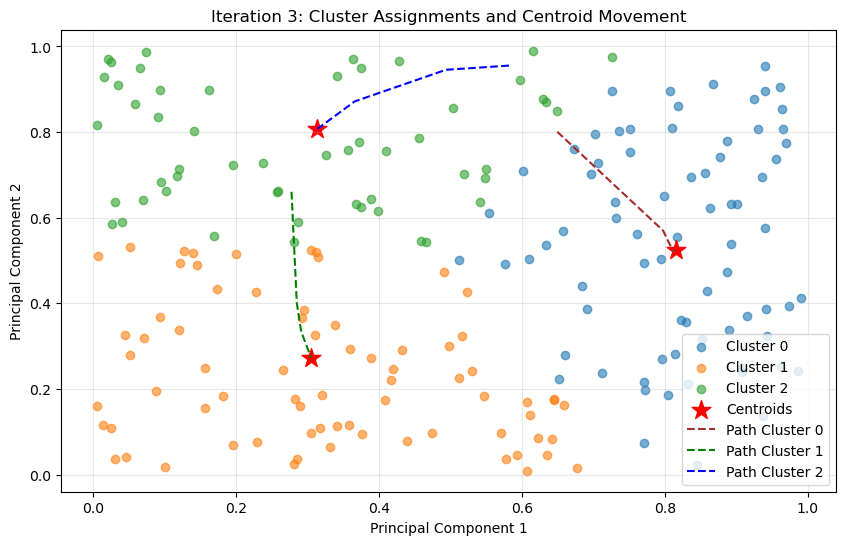

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


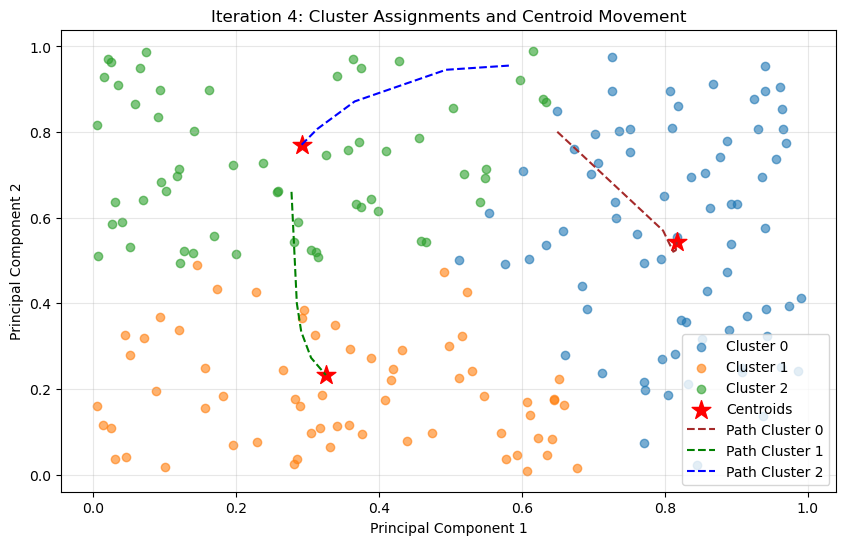

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


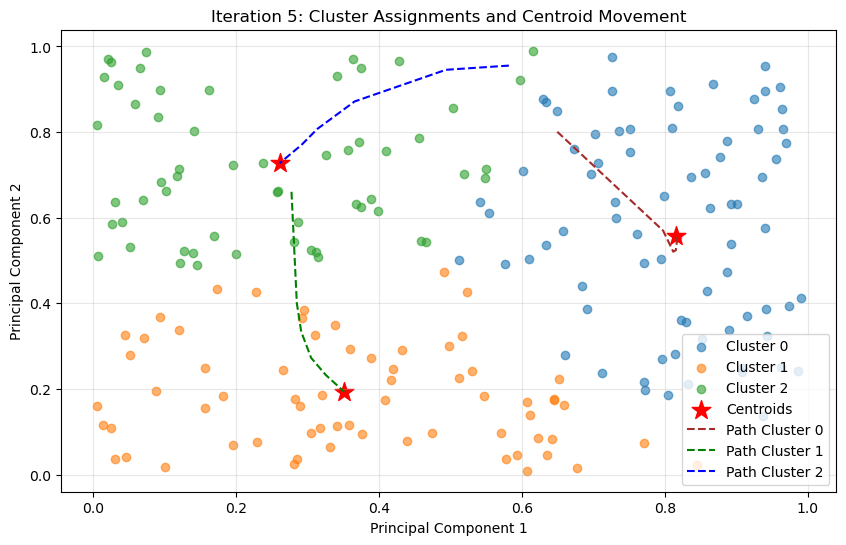

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to plot the path taken by centroids during K-means iterations
def plot_k_means_progress(centroid_history, n_clusters, iterations, cluster_color):
    """
    Plot the path taken by centroids during K-means iterations.

    Parameters:
    - centroid_history: 2D array storing the history of centroids for all iterations.
    - n_clusters: Total number of clusters.
    - iterations: Total number of iterations completed.
    - cluster_color: Dictionary of colors for each cluster.

    Returns:
    - A plot showing the movement of centroids during K-means.
    """
    for i in range(n_clusters):
        c_x = []  # To store X-coordinates of the centroid's path
        c_y = []  # To store Y-coordinates of the centroid's path
        for j in range(iterations + 1):  # Include initial centroids
            index = i + j * n_clusters  # Calculate index for the centroid history
            c_x.append(centroid_history[index, 0])
            c_y.append(centroid_history[index, 1])
        # Plot the centroid's path
        plt.plot(c_x, c_y, c=cluster_color[f'c_{i}'], linestyle='--', label=f'Path Cluster {i}')

# Initialize cluster colors (supporting up to 7 clusters)
cluster_color = {f'c_{i}': color for i, color in enumerate(['brown', 'green', 'blue', 'purple', 'orange', 'pink', 'cyan'])}

# Number of clusters
n_clusters = 3

# Initial centroids (for demonstration purposes; you can use random initialization too)
initial_centroid = np.random.rand(n_clusters, 2)  # Randomly initialize centroids in 2D space

# Store centroid history
centroid_history = initial_centroid.copy()

# Simulate data for clustering (replace `reduced_data` with your actual dataset)
np.random.seed(42)  # For reproducibility
X = np.random.rand(200, 2)  # Replace this with your reduced PCA data

# Perform K-means clustering for multiple iterations
for i in range(1, 6):  # 5 iterations of K-means
    kmeans = KMeans(n_clusters=n_clusters, init=centroid_history[-n_clusters:], n_init=1, max_iter=1, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Plot the data points and cluster assignments
    plt.figure(figsize=(10, 6))
    for cluster_id in range(n_clusters):
        plt.scatter(
            X[clusters == cluster_id, 0], X[clusters == cluster_id, 1],
            label=f'Cluster {cluster_id}', alpha=0.6
        )
    
    # Plot the current centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=200, c='red', label='Centroids', marker='*'
    )

    # Update centroid history
    centroid_history = np.vstack([centroid_history, kmeans.cluster_centers_])
    
    # Plot the centroid paths
    plot_k_means_progress(centroid_history, n_clusters, i, cluster_color)

    # Configure plot
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Iteration {i}: Cluster Assignments and Centroid Movement')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [54]:
# Assuming df_clustered is the dataframe with the clustering results

# Function to display and analyze the patients in each cluster
def analyze_cluster_data(df_clustered, cluster_column='Cluster'):
    for cluster_id in df_clustered[cluster_column].unique():
        # Get patients in the current cluster
        cluster_patients = df_clustered[df_clustered[cluster_column] == cluster_id]
        
        # Calculate key statistics for the cluster
        avg_age = cluster_patients['Age'].mean()
        avg_bmi = cluster_patients['BMI'].mean()
        avg_bp = cluster_patients['Blood_Pressure'].mean()
        avg_glucose = cluster_patients['Glucose_Level'].mean()
        diabetes_rate = cluster_patients['Has_Diabetes'].mean()
        asthma_rate = cluster_patients['Has_Asthma'].mean()
        stroke_rate = cluster_patients['Has_Stroke'].mean()

        # Print out the cluster analysis
        print(f"\n--- Analysis for Cluster {cluster_id} ---")
        print(f"Average Age: {avg_age:.2f}")
        print(f"Average BMI: {avg_bmi:.2f}")
        print(f"Average Blood Pressure: {avg_bp:.2f}")
        print(f"Average Glucose Level: {avg_glucose:.2f}")
        print(f"Diabetes Rate: {diabetes_rate * 100:.2f}%")
        print(f"Asthma Rate: {asthma_rate * 100:.2f}%")
        print(f"Stroke Rate: {stroke_rate * 100:.2f}%")
        
        # Add commentary based on observations
        if avg_age < 40 and avg_bmi < 25 and avg_bp < 120 and avg_glucose < 100:
            print("This cluster consists of relatively young and healthy patients with normal BMI, low blood pressure, "
                  "and normal glucose levels. They are less likely to have chronic conditions.")
        elif avg_age >= 60 and avg_bmi < 30 and avg_bp >= 140 and avg_glucose >= 140:
            print("This cluster comprises older patients with elevated blood pressure and high glucose levels. "
                  "They might be at higher risk of chronic conditions such as hypertension and diabetes.")
        elif avg_bmi >= 30 and avg_glucose >= 150:
            print("This cluster includes patients with high BMI and elevated glucose levels, indicating a tendency "
                  "toward metabolic issues such as obesity and diabetes.")
        elif avg_age < 40 and avg_bmi >= 30:
            print("This cluster consists of younger patients with high BMI, possibly indicating early-onset obesity. "
                  "They may benefit from lifestyle interventions.")
        elif avg_age < 40 and avg_bp >= 140:
            print("This cluster includes younger patients with elevated blood pressure, suggesting early-onset hypertension, "
                "which may require lifestyle changes or medical intervention.")
        elif avg_bp >= 150 and stroke_rate > 50:
            print("This cluster has a significant proportion of patients with very high blood pressure and a history of stroke. "
                  "It may represent a high-risk group needing intensive monitoring.")
        elif diabetes_rate > 50 and asthma_rate > 50:
            print("This cluster has a high prevalence of diabetes and asthma, indicating potential metabolic or environmental factors. "
                  "This group may benefit from targeted medical interventions.")
        elif avg_glucose > 180:
            print("This cluster includes patients with very high glucose levels, suggesting poorly controlled diabetes or other metabolic conditions.")
        elif avg_age >= 70 and stroke_rate > 40:
            print("This cluster consists primarily of older individuals with a high incidence of stroke, possibly due to age-related risk factors.")
        elif avg_age >= 70 and avg_bmi < 18.5:
            print("This cluster represents elderly patients with low BMI, possibly indicating malnutrition or chronic illness.")
        elif avg_bmi < 18.5:
            print("This cluster represents underweight patients who might be experiencing malnutrition or chronic health conditions.")
        elif avg_age >= 50 and avg_bp >= 140 and avg_glucose < 100:
            print("This cluster includes older patients with high blood pressure but controlled glucose levels, suggesting isolated hypertension.")
        elif avg_age < 30 and asthma_rate > 60:
            print("This cluster includes younger patients with a high prevalence of asthma, possibly linked to environmental or genetic factors.")
        elif avg_bp < 90 and avg_glucose < 70:
            print("This cluster includes patients with hypotension and hypoglycemia, possibly due to underlying health issues such as adrenal insufficiency.")
        elif avg_age >= 80 and diabetes_rate < 10:
            print("This cluster consists of very elderly patients with surprisingly low diabetes rates, possibly indicating good metabolic health.")
        elif avg_bmi >= 40:
            print("This cluster includes morbidly obese patients with high BMI values, likely at significant risk for metabolic and cardiovascular diseases.")
        elif asthma_rate > 70 and avg_age >= 60:
            print("This cluster consists of older patients with a high prevalence of asthma, possibly exacerbated by age-related factors or chronic conditions.")
        elif avg_glucose < 50 and avg_bmi < 18.5:
            print("This cluster represents underweight patients with dangerously low glucose levels, potentially indicative of severe malnutrition or other health crises.")
        elif stroke_rate > 60 and avg_bp < 120:
            print("This cluster includes patients with a high incidence of stroke despite normal blood pressure, suggesting other stroke-related risk factors.")
        else:
            print("This cluster shows mixed characteristics and requires further investigation to determine patterns.")

        
        print("\n" + "-"*50)  # Separator for readability

# Call the function to analyze the clusters
analyze_cluster_data(df_clustered)



--- Analysis for Cluster 2 ---
Average Age: 57.32
Average BMI: 23.91
Average Blood Pressure: 129.34
Average Glucose Level: 145.11
Diabetes Rate: 83.93%
Asthma Rate: 35.71%
Stroke Rate: 76.79%
This cluster shows mixed characteristics and requires further investigation to determine patterns.

--------------------------------------------------

--- Analysis for Cluster 0 ---
Average Age: 50.39
Average BMI: 29.12
Average Blood Pressure: 155.82
Average Glucose Level: 130.93
Diabetes Rate: 8.20%
Asthma Rate: 40.98%
Stroke Rate: 81.97%
This cluster shows mixed characteristics and requires further investigation to determine patterns.

--------------------------------------------------

--- Analysis for Cluster 1 ---
Average Age: 49.07
Average BMI: 30.57
Average Blood Pressure: 129.12
Average Glucose Level: 125.61
Diabetes Rate: 49.40%
Asthma Rate: 78.31%
Stroke Rate: 12.05%
This cluster shows mixed characteristics and requires further investigation to determine patterns.

--------------------

### **Conclusions**

**Conclusion pour Cluster 0** : Ce cluster inclut des individus d’âge moyen avec une pression artérielle très élevée et un surpoids, associés à un risque cardiovasculaire important (taux d'AVC élevé). Malgré un faible taux de diabète, des stratégies de gestion de l'hypertension et du poids sont essentielles pour ce groupe. Se sont des **Personnes d'âge moyen avec hypertension et risque cardiovasculaire**.

**Conclusion pour Cluster 1** : Ce cluster est constitué de jeunes individus obèses avec une prévalence significative de diabète et une proportion remarquablement élevée d'asthme. Cependant, le taux d'AVC est bas, indiquant que ce groupe est davantage affecté par des troubles métaboliques et respiratoires. Se sont **Jeunes obèses avec troubles métaboliques et respiratoires**.

**Conclusion pour Cluster 2** : Ce cluster est dominé par des individus plus âgés avec un poids normal mais présentant une forte prévalence de diabète et d'AVC. Ce groupe pourrait nécessiter des interventions médicales ciblées pour gérer les complications liées au diabète et aux maladies cardiovasculaires. Se sont des **Personnes âgées à haut risque de diabète**.